# Learning from Demonstrations

<img src="https://github.com/jeremiedecock/polytechnique-inf639-2024-students/blob/main/assets/logo.jpg?raw=true" style="float: left; width: 15%" />

[CSC_53439_EP-2024](https://moodle.polytechnique.fr/course/view.php?id=19358) Lab session #4

2019-2024 Jérémie Decock

[![Open in Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jeremiedecock/polytechnique-inf639-2024-students/blob/main/lab4_lfd_and_pbrl.ipynb)

[![My Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jeremiedecock/polytechnique-inf639-2024-students/main?filepath=lab4_lfd_and_pbrl.ipynb)

[![NbViewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/jeremiedecock/polytechnique-inf639-2024-students/blob/main/lab4_lfd_and_pbrl.ipynb)

[![Local](https://img.shields.io/badge/Local-Save%20As...-blue)](https://github.com/jeremiedecock/polytechnique-inf639-2024-students/raw/main/lab4_lfd_and_pbrl.ipynb)

## Introduction

The purpose of this lab is to introduce some classic algorithms of *Learning from Demonstrations*. We will see how they work, their caveats and benefits.

*Learning from Demonstrations* (LfD) is an approach in reinforcement learning where an agent learns behaviors by observing examples provided by a demonstrator. This field is divided into two main branches: *Imitation Learning* and *Inverse Reinforcement Learning* (IRL).

- **Imitation Learning** involves directly mimicking the demonstrator's actions. The agent learns to replicate the demonstrated behavior without attempting to infer the underlying objectives or rewards driving the actions. It focuses on reproducing successful behaviors in a given task, often through supervised learning.

- **Inverse Reinforcement Learning (IRL)**, on the other hand, seeks to infer the demonstrator's underlying reward function. Instead of copying actions, the agent tries to discover the goals or preferences that motivated the demonstrator’s behavior. Once the reward function is learned, the agent can optimize its own policy to achieve similar outcomes.

Both approaches aim to accelerate learning in complex environments by leveraging expert knowledge, but they differ in how they approach the problem of learning from demonstrations.

In the first part of this lab, we will focus on *Imitation Learning* using the *Behavioral Cloning* algorithm. The second part will shift to *Inverse Reinforcement Learning* through the use of the *GAIL* algorithm.

You can either:
- open, edit and execute the notebook in *Google Colab* following this link: https://colab.research.google.com/github/jeremiedecock/polytechnique-inf639-2024-students/blob/main/lab4_lfd_and_pbrl.ipynb ; this is the **recommended** choice as you have nothing to install on your computer
- open, edit and execute the notebook in *MyBinder* (if for any reason the Google Colab solution doesn't work): https://mybinder.org/v2/gh/jeremiedecock/polytechnique-inf639-2024-students/main?filepath=lab4_lfd_and_pbrl.ipynb
- download, edit and execute the notebook on your computer if Python3 and JypyterLab are already installed: https://github.com/jeremiedecock/polytechnique-inf639-2024-students/raw/main/lab4_lfd_and_pbrl.ipynb

If you work with Google Colab or MyBinder, **remember to save or download your work regularly or you may lose it!**

## Setup the Python environment

This notebook relies on several libraries including `torch`, `gymnasium`, `numpy`, `pandas`, `seaborn`, `imageio`, `pygame`, and `tqdm`.
A complete list of dependencies can be found in the provided [requirements-minimal.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2024-students/main/requirements-minimal.txt) and [requirements.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2024-students/main/requirements.txt) files.

- [requirements-minimal.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2024-students/main/requirements.txt) contains the minimal dependencies required to run this notebook without the optional sections.
- [requirements.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2024-students/main/requirements.txt) contains all the dependencies required to run this notebook with all the optional sections.

### If you use Google Colab

If you use Google Colab, execute the next cell to install required libraries.

In [1]:
import sys, subprocess

def is_colab():
    return "google.colab" in sys.modules

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

if is_colab():
    run_subprocess_command("apt install swig xvfb x11-utils")
    run_subprocess_command("pip install -r https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2024-students/main/requirements-lab4-google-colab.txt")

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 swig4.0 x11-xkb-utils xfonts-base
xfonts-encodings xfonts-utils xserver-common
Suggested packages:
swig-doc swig-examples swig4.0-examples swig4.0-doc mesa-utils
The following NEW packages will be installed:
libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 swig swig4.0 x11-utils x11-xkb-utils
xfonts-base xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 14 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,161 kB of archives.
After this operation, 18.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.

In [ ]:
#! apt install swig xvfb x11-utils && pip install gymnasium[box2d,classic-control] pyvirtualdisplay

### If you have downloaded the notebook on your computer and execute it in your own Python environment

To set up the necessary dependencies, first download the [requirements.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2024-students/main/requirements.txt) or [requirements-minimal.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2024-students/main/requirements-minimal.txt) depending on whether you want to run the optional sections of this notebook or not (c.f. *Setup the Python environment* section above).

Ensure it is located in the same directory as this notebook. Next, run the following command to establish a [Python virtual environment (venv)](https://docs.python.org/3/library/venv.html) that includes all the essential libraries for this lab.

#### On Posix systems (Linux, MacOSX, WSL, ...)

```bash
python3 -m venv env
source env/bin/activate
python3 -m pip install --upgrade pip
python3 -m pip install -r requirements.txt
```

Adapt the name of the requirements file if you have chosen to use the minimal version.

#### On Windows

```bash
python3 -m venv env
env\Scripts\activate.bat
python3 -m pip install --upgrade pip
python3 -m pip install -r requirements.txt
```

Adapt the name of the requirements file if you have chosen to use the minimal version.

### Run notebooks locally in a dedicated Docker container

If you are familiar with Docker, an image is available on Docker Hub for this lab:

```bash
docker run -it --rm -p 8888:8888 -v "${PWD}":/home/jovyan/work jdhp/inf639-lab4:latest
```

If you encounter an error during the notebook's execution indicating that writing a file is not possible, this issue may stem from the user ID within the container lacking the necessary permissions in the project directory. This problem can be resolved by modifying the directory's permissions, for example, using the command:

```bash
chmod 777 . figs models
rm -rf figs/*.gif
rm -rf figs/*.png
rm -rf models/*.pth
```

### Import required packages

In [2]:
import gymnasium as gym
from IPython.display import Video
import json
import lzma
import numpy as np
from numpy.typing import NDArray
import pandas as pd
from pathlib import Path
import torch
from typing import List, Tuple, Deque, Optional, Callable

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns
from tqdm.notebook import tqdm

In [4]:
gym.__version__

'0.29.1'

In [5]:
sns.set_context("talk")

In [6]:
FIGS_DIR = Path("figs/")       # Where to save figures (.gif files)
PLOTS_DIR = Path("figs/")      # Where to save plots (.png or .svg files)
MODELS_DIR = Path("models/")   # Where to save models (.pth files)

In [7]:
if not FIGS_DIR.exists():
    FIGS_DIR.mkdir()
if not PLOTS_DIR.exists():
    PLOTS_DIR.mkdir()
if not MODELS_DIR.exists():
    MODELS_DIR.mkdir()

### PyTorch setup

PyTorch can run on both CPUs and GPUs. The following cell will determine the device PyTorch will use. If a GPU is available, PyTorch will use it; otherwise, it will use the CPU.

For utilizing a GPU on Google Colab, you also have to activate it following the steps outlined [here](https://colab.research.google.com/notebooks/gpu.ipynb).

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set the device to CUDA if available, otherwise use CPU

In [ ]:
# device = "cpu"

In [9]:
print(f"PyTorch will train and test neural networks on {device}")

PyTorch will train and test neural networks on cpu


In [10]:
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")

If you have a recent GPU (e.g. RTX 4060 Ti 16G) and want to use it, you may need to install a specific version of PyTorch compatible with your Cuda version (e.g. Cuda 12.4). For this, you will have to edit the `requirements.txt` file and replace the current version of PyTorch with the one compatible with your Cuda version. Check the [official PyTorch website](https://pytorch.org/get-started/locally/) for more information.

## Part 1: Behavioral Cloning

### Exercise 1: Hands on MountainCar environment

The MountainCar is a classic reinforcement learning environment. In this simple 2D scenario, an underpowered car must navigate a hill, but it lacks the power to ascend directly. Instead, the car must learn to use the hill's slopes to build momentum and ultimately reach the flag at the top. While the environment is straightforward, it becomes interesting due to its sparse reward signal, making it an excellent candidate for learning from demonstrations.

**Task 1:** refer to the following link [MountainCar Environment](https://gymnasium.farama.org/environments/classic_control/mountain_car/) to familiarize yourself with the MountainCar environment if you are not already.

Print some information about the environment:

In [11]:
env = gym.make('MountainCar-v0', render_mode="rgb_array")

mountain_car_state_dim = env.observation_space.shape[0]
mountain_car_action_dim = env.action_space.n.item()

print(f"State space size is: { env.observation_space }")
print(f"Action space size is: { env.action_space }")
print("Actions are: {" + ", ".join([str(a) for a in range(env.action_space.n)]) + "}")

env.close()

State space size is: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space size is: Discrete(3)
Actions are: {0, 1, 2}


**Task 2:** Run the following cells and check different basic
policies (for instance constant actions or randomly drawn actions) to discover the MountainCar environment.

#### Test the MountainCar environment with a constant policy

In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [13]:
VIDEO_DIRNAME = "lab4_mountain-car_action0"

env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    action = 0
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_mountain-car_action0/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_mountain-car_action0/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_mountain-car_action0/rl-video-episode-0.mp4


In [14]:
VIDEO_DIRNAME = "lab4_mountain-car_action1"

env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    action = 1
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_mountain-car_action1/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_mountain-car_action1/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_mountain-car_action1/rl-video-episode-0.mp4


In [15]:
VIDEO_DIRNAME = "lab4_mountain-car_action2"

env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    action = 2
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_mountain-car_action2/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_mountain-car_action2/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_mountain-car_action2/rl-video-episode-0.mp4


#### Test the MountainCar environment with a random policy

In [16]:
VIDEO_DIRNAME = "lab4_mountain-car_random_action"

env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_mountain-car_random_action/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_mountain-car_random_action/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_mountain-car_random_action/rl-video-episode-0.mp4


#### Test the MountainCar environment with a good handcrafted policy

**Task 3:** The MountainCar environment is simple in design but poses a significant challenge for many algorithms, such as PPO, due to its sparse reward structure. The agent must engage in extensive exploration before receiving its first positive reward, which occurs only when it successfully reaches the flag at the top of the hill. Despite this, the task can be solved with a surprisingly simple policy. Can you discover it?

In [17]:
VIDEO_DIRNAME = "lab4_mountain-car_random_action"

env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):

    ### BEGIN SOLUTION ###

    action = 2 if observation[1] >= 0 else 0  # Observation[1] is the velocity
    observation, reward, done, truncated, info = env.step(action)

    ### END SOLUTION ###

    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_mountain-car_random_action/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_mountain-car_random_action/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_mountain-car_random_action/rl-video-episode-0.mp4


### Behavioral Cloning

*Behavioral Cloning* ([D. A. Pomerleau, *Efficient Training of Artificial Neural Networks for Autonomous Navigation*, Neural Computation, vol. 3, no. 1, pp. 88–97, 1991](https://cours.etsmtl.ca/sys843/REFS/ORG/pomerleau_alvinn.pdf)) is one of the most fundamental approaches to *Imitation Learning*. The concept is straightforward: an *expert* provides high-quality traces, or demonstrations, and the learning agent's task is to mimic the expert’s behavior.
In *Imitation Learning*, *traces* or *demonstrations* refer to sequences of state-action pairs generated by an expert while performing a task. These demonstrations serve as examples for the agent to learn from. Each demonstration consists of a series of observations (states) encountered by the expert, along with the corresponding actions taken in those states.
For example, in a driving task, a demonstration might be a series of snapshots of the environment (such as the car’s position and speed) and the actions the expert driver took at each moment (such as steering or braking). These state-action pairs are recorded and used to train the agent, enabling it to learn how to behave similarly in similar situations.

The goal of *Behavioral Cloning* is to map states to the actions the expert would take, essentially allowing the agent to "clone" the expert's behavior. The quality and variety of these demonstrations are critical for successful learning, as they provide the agent with the knowledge it needs to act appropriately across different scenarios.
Typically, expert demonstrations are obtained by recording human behavior, which is then used to train the agent.

**Note**: In the original publication, the algorithm learns a stochastic policy by maximizing the likelihood of the expert's actions. However, in this lab, we will train a deterministic policy by minimizing the Categorical Cross Entropy between the expert's actions and the model’s predictions.

### Exercise 2: Behavioral Cloning on MountainCar

#### Make a PyTorch dataset from the demonstrations

##### Download expert demonstrations

The expert demonstrations are available at the following URL: https://github.com/jeremiedecock/polytechnique-inf639-2024-students/raw/refs/heads/main/models/lab4_expert_mountaincar-v0_handcrafted/demonstrations.json.xz

In [18]:
!mkdir -p models/lab4_expert_mountaincar-v0_handcrafted

In [19]:
!wget https://github.com/jeremiedecock/polytechnique-inf639-2024-students/raw/refs/heads/main/models/lab4_expert_mountaincar-v0_handcrafted/demonstrations.json.xz -O models/lab4_expert_mountaincar-v0_handcrafted/demonstrations.json.xz

--2024-10-14 11:58:22--  https://github.com/jeremiedecock/polytechnique-inf639-2024-students/raw/refs/heads/main/models/lab4_expert_mountaincar-v0_handcrafted/demonstrations.json.xz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2024-students/refs/heads/main/models/lab4_expert_mountaincar-v0_handcrafted/demonstrations.json.xz [following]
--2024-10-14 11:58:23--  https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2024-students/refs/heads/main/models/lab4_expert_mountaincar-v0_handcrafted/demonstrations.json.xz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

##### Make the dataset

In [20]:
class ExpertDemonstrationsDataset(torch.utils.data.Dataset):
    def __init__(self, json_demonstrations_file_path, transform=None, target_transform=None):
        super().__init__()
        self.json_demonstrations_file_path = json_demonstrations_file_path

        with lzma.open(self.json_demonstrations_file_path, "rt") as f:
            demonstrations_list = json.load(f)

        self._observations_tensor = torch.tensor([transition["observation"] for transition in demonstrations_list], dtype=torch.float32)
        self._actions_tensor = torch.tensor([transition["action"] for transition in demonstrations_list], dtype=torch.long)

        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self._observations_tensor)

    def __getitem__(self, idx):
        observation = self._observations_tensor[idx]
        action = self._actions_tensor[idx]

        if self.transform:
            observation = self.transform(observation)
        if self.target_transform:
            action = self.target_transform(action)

        return observation, action

In [21]:
mountain_car_expert_dataset = ExpertDemonstrationsDataset(Path("models") / "lab4_expert_mountaincar-v0_handcrafted" / "demonstrations.json.xz")

**Task1**: Take time to check the definition and the content of this dataset.

##### Plot the dataset

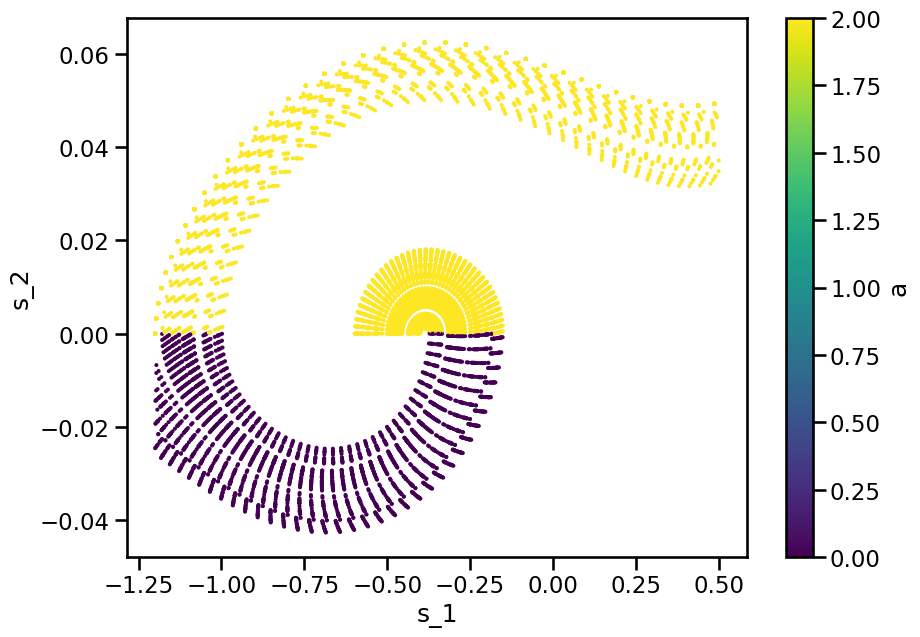

In [22]:
expert_policy_df = pd.DataFrame([{"s_1": observation_tensor[0], "s_2": observation_tensor[1], "a": action_tensor} for observation_tensor, action_tensor in mountain_car_expert_dataset])
expert_policy_df.plot(kind="scatter", x="s_1", y="s_2", c="a", colormap="viridis", colorbar=True, figsize=(10, 7), s=2);

#### Define the neural network

**Task2**: Implement a neural network that takes the state as input and outputs the action. The neural network should have the following architecture:
- A first fully connected layer with `hidden_units` units and ReLU activation function
- A second fully connected layer with `n_actions` units and no activation function

In [28]:
class DiscretePolicyNetwork(torch.nn.Module):

    def __init__(self, n_observations: int, n_actions: int, hidden_units: int):

        super(DiscretePolicyNetwork, self).__init__()

        ### BEGIN SOLUTION ###

        self.layer1 = torch.nn.Linear(n_observations, hidden_units)
        self.layer2 = torch.nn.ReLU()

        self.layer3 = torch.nn.Linear(hidden_units, n_actions)

        ### END SOLUTION ###

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        ### BEGIN SOLUTION ###
        x = self.layer1(x)
        x = self.layer2(x)
        logits = self.layer3(x)


        ### END SOLUTION ###

        return logits

In [29]:
mountain_car_model = DiscretePolicyNetwork(n_observations=mountain_car_state_dim, n_actions=mountain_car_action_dim, hidden_units=8).to(device)
print(mountain_car_model)

DiscretePolicyNetwork(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): ReLU()
  (layer3): Linear(in_features=8, out_features=3, bias=True)
)


#### Define the training loop

**Task3**: Implement a classical supervised learning training function that train one epoch of the neural network on the dataset. This function will be called at each epoch in the *Train the model* cell defined below.

In [30]:
def train(dataloader, model, loss_fn, optimizer, verbose=True):

    ### BEGIN SOLUTION ###

    size = len(dataloader.dataset)
    model.train()  # Set the model to training mode

    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()  # Clear the gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update the parameters

        if verbose and batch % 100 == 0:
            loss_value = loss.item()
            current = batch * len(X)
            print(f"loss: {loss_value:>7f}  [{current:>5d}/{size:>5d}]")

    ### END SOLUTION ###

#### Define the testing loop

**Task4**: Implement a classical supervised learning testing function that assess the performance of the neural network on the test dataset at each epoch. This function will be called at each epoch in the *Train the model* cell defined below.

In [31]:
def test(dataloader, model, loss_fn):

    ### BEGIN SOLUTION ###

    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()  # Set the model to evaluation mode
    test_loss, correct = 0, 0

    with torch.no_grad():  # Disable gradient calculation
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()  # Accumulate the loss
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()  # Count correct predictions

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    ### END SOLUTION ###

#### Split the dataset

In the following cell, we will split the dataset (expert demonstrations) into a training and a test set.

In [32]:
train_size = int(0.8 * len(mountain_car_expert_dataset))
test_size = len(mountain_car_expert_dataset) - train_size

train_subset, test_subset = torch.utils.data.random_split(mountain_car_expert_dataset, [train_size, test_size])

mountain_car_train_dataloader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
mountain_car_test_dataloader = torch.utils.data.DataLoader(test_subset, batch_size=32, shuffle=False)

#### Define the loss function and the optimizer

**Task5**: Define the loss function used to train the neural network.

In [33]:
### BEGIN SOLUTION ###

mountain_car_loss_fn = torch.nn.CrossEntropyLoss()

### END SOLUTION ###

mountain_car_optimizer = torch.optim.Adam(mountain_car_model.parameters())

#### Train the model

In [34]:
epochs = 50
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}\n-------------------------------")

    train(mountain_car_train_dataloader, mountain_car_model, mountain_car_loss_fn, mountain_car_optimizer, verbose=False)
    test(mountain_car_test_dataloader, mountain_car_model, mountain_car_loss_fn)

Epoch 1/50
-------------------------------
Test Error: 
 Accuracy: 65.7%, Avg loss: 0.741292 

Epoch 2/50
-------------------------------
Test Error: 
 Accuracy: 65.7%, Avg loss: 0.673521 

Epoch 3/50
-------------------------------
Test Error: 
 Accuracy: 65.7%, Avg loss: 0.648366 

Epoch 4/50
-------------------------------
Test Error: 
 Accuracy: 65.7%, Avg loss: 0.622570 

Epoch 5/50
-------------------------------
Test Error: 
 Accuracy: 65.7%, Avg loss: 0.575959 

Epoch 6/50
-------------------------------
Test Error: 
 Accuracy: 75.2%, Avg loss: 0.525362 

Epoch 7/50
-------------------------------
Test Error: 
 Accuracy: 77.0%, Avg loss: 0.491648 

Epoch 8/50
-------------------------------
Test Error: 
 Accuracy: 79.7%, Avg loss: 0.463292 

Epoch 9/50
-------------------------------
Test Error: 
 Accuracy: 81.9%, Avg loss: 0.435310 

Epoch 10/50
-------------------------------
Test Error: 
 Accuracy: 84.3%, Avg loss: 0.408293 

Epoch 11/50
-------------------------------
Test 

##### Plot the learned policy

You can now compare the learned policy with the expert's policy.

In [ ]:
# expert_policy_df = pd.DataFrame([{"s_1": test_subset[idx][0][0], "s_2": test_subset[idx][0][1], "a": test_subset[idx][1]} for idx in range(len(test_subset))])
# expert_policy_df.plot(kind="scatter", x="s_1", y="s_2", c="a", colormap="viridis", colorbar=True, figsize=(10, 7), s=2);

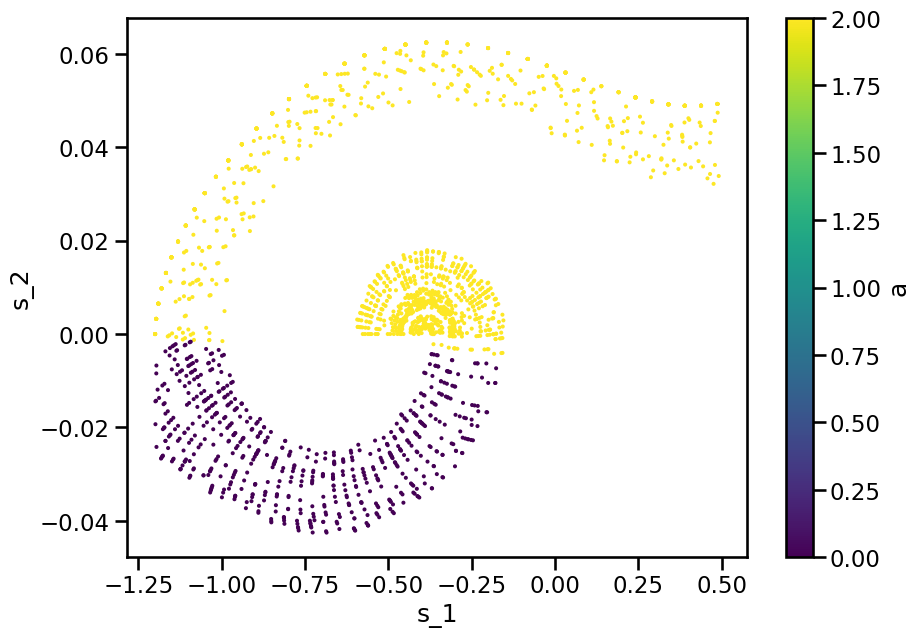

In [35]:
expert_policy_df = pd.DataFrame([{"s_1": test_subset[idx][0][0], "s_2": test_subset[idx][0][1], "a": mountain_car_model(test_subset[idx][0]).argmax().item()} for idx in range(len(test_subset))])
expert_policy_df.plot(kind="scatter", x="s_1", y="s_2", c="a", colormap="viridis", colorbar=True, figsize=(10, 7), s=2);

#### Test the learned policy

In [36]:
VIDEO_DIRNAME = "lab4_mountain-car_trained_policy"

env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    observation_tensor = torch.tensor(observation, dtype=torch.float32).to(device)
    action = mountain_car_model(observation_tensor).argmax().item()
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_mountain-car_trained_policy/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_mountain-car_trained_policy/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_mountain-car_trained_policy/rl-video-episode-0.mp4


### Exercise 3: Hands on LunarLander environment

In this exercise, we will apply the *Behavioral Cloning* algorithm to the LunarLander environment. The LunarLander environment is a classic reinforcement learning task where an agent must learn to land a spacecraft safely on the moon. The agent controls the spacecraft's engines, which can fire in four directions: do nothing, fire left, fire right, or fire both engines downward. The agent receives a reward for successfully landing the spacecraft and a penalty for crashing or running out of fuel.

The reward signal is less sparse than in the MountainCar environment, but the dynamics is more complex making it interesting too for *Imitation Learning*.

**Task 1:** refer to the following link [LunarLander-v2 Environment](https://gymnasium.farama.org/environments/box2d/lunar_lander/) to familiarize yourself with the LunarLander-v2 environment if you are not already.

Print some information about the environment:

In [37]:
env = gym.make('LunarLander-v2', render_mode="rgb_array")

lunar_lander_state_dim = env.observation_space.shape[0]
lunar_lander_action_dim = env.action_space.n.item()

print(f"State space size is: { env.observation_space }")
print(f"Action space size is: { env.action_space }")
print("Actions are: {" + ", ".join([str(a) for a in range(env.action_space.n)]) + "}")

env.close()

State space size is: Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
Action space size is: Discrete(4)
Actions are: {0, 1, 2, 3}


**Task 2:** Run the following cells and check different basic
policies (for instance constant actions or randomly drawn actions) to discover the LunarLander-v2 environment.

#### Test the LunarLander environment with a constant policy

In [38]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [39]:
VIDEO_DIRNAME = "lab4_lunar-lander_action0"

env = gym.make('LunarLander-v2', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    action = 0
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_lunar-lander_action0/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_action0/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_action0/rl-video-episode-0.mp4


In [40]:
VIDEO_DIRNAME = "lab4_lunar-lander_action1"

env = gym.make('LunarLander-v2', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    action = 1
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_lunar-lander_action1/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_action1/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_action1/rl-video-episode-0.mp4


In [41]:
VIDEO_DIRNAME = "lab4_lunar-lander_action2"

env = gym.make('LunarLander-v2', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    action = 2
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_lunar-lander_action2/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_action2/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_action2/rl-video-episode-0.mp4


In [42]:
VIDEO_DIRNAME = "lab4_lunar-lander_action3"

env = gym.make('LunarLander-v2', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    action = 3
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_lunar-lander_action3/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_action3/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_action3/rl-video-episode-0.mp4


#### Test the LunarLander environment with a random policy

In [43]:
VIDEO_DIRNAME = "lab4_lunar-lander_random_action"

env = gym.make('LunarLander-v2', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_lunar-lander_random_action/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_random_action/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_random_action/rl-video-episode-0.mp4


### Exercise 4: Behavioral Cloning on LunarLander

In this exercise, we will reuse most of the code from the previous exercise to apply the *Behavioral Cloning* algorithm to the LunarLander environment.
There are very little to do except check that the code of the previous exercise is still working on the LunarLander environment.

#### Make a PyTorch dataset from the demonstrations

##### Download expert demonstrations

The expert demonstrations are available at the following URL: https://github.com/jeremiedecock/polytechnique-inf639-2024-students/raw/refs/heads/main/models/lab4_expert_lunar-lander-v2-discrete-nowind_ppo/demonstrations.json.xz

In [44]:
!mkdir -p models/lab4_expert_lunar-lander-v2-discrete-nowind_ppo

In [45]:
!wget https://github.com/jeremiedecock/polytechnique-inf639-2024-students/raw/refs/heads/main/models/lab4_expert_lunar-lander-v2-discrete-nowind_ppo/demonstrations.json.xz -O models/lab4_expert_lunar-lander-v2-discrete-nowind_ppo/demonstrations.json.xz

--2024-10-14 12:12:39--  https://github.com/jeremiedecock/polytechnique-inf639-2024-students/raw/refs/heads/main/models/lab4_expert_lunar-lander-v2-discrete-nowind_ppo/demonstrations.json.xz
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2024-students/refs/heads/main/models/lab4_expert_lunar-lander-v2-discrete-nowind_ppo/demonstrations.json.xz [following]
--2024-10-14 12:12:40--  https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2024-students/refs/heads/main/models/lab4_expert_lunar-lander-v2-discrete-nowind_ppo/demonstrations.json.xz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request 

In [46]:
lunar_lander_expert_dataset = ExpertDemonstrationsDataset(Path("models") / "lab4_expert_lunar-lander-v2-discrete-nowind_ppo" / "demonstrations.json.xz")

#### Define the neural network

In [47]:
lunar_lander_model = DiscretePolicyNetwork(n_observations=lunar_lander_state_dim, n_actions=lunar_lander_action_dim, hidden_units=64).to(device)
print(lunar_lander_model)

DiscretePolicyNetwork(
  (layer1): Linear(in_features=8, out_features=64, bias=True)
  (layer2): ReLU()
  (layer3): Linear(in_features=64, out_features=4, bias=True)
)


#### Split the dataset

In [48]:
train_size = int(0.8 * len(lunar_lander_expert_dataset))
test_size = len(lunar_lander_expert_dataset) - train_size

train_subset, test_subset = torch.utils.data.random_split(lunar_lander_expert_dataset, [train_size, test_size])

lunar_lander_train_dataloader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
lunar_lander_test_dataloader = torch.utils.data.DataLoader(test_subset, batch_size=32, shuffle=False)

#### Define the loss function and the optimizer

**Task1**: Define the loss function used to train the neural network.

In [49]:
### BEGIN SOLUTION ###

lunar_lander_loss_fn = torch.nn.CrossEntropyLoss()

### END SOLUTION ###

lunar_lander_optimizer = torch.optim.Adam(lunar_lander_model.parameters())

#### Train the model

In [50]:
epochs = 10
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}\n-------------------------------")

    train(lunar_lander_train_dataloader, lunar_lander_model, lunar_lander_loss_fn, lunar_lander_optimizer, verbose=False)
    test(lunar_lander_test_dataloader, lunar_lander_model, lunar_lander_loss_fn)

Epoch 1/10
-------------------------------
Test Error: 
 Accuracy: 78.5%, Avg loss: 0.516880 

Epoch 2/10
-------------------------------
Test Error: 
 Accuracy: 82.9%, Avg loss: 0.413147 

Epoch 3/10
-------------------------------
Test Error: 
 Accuracy: 86.0%, Avg loss: 0.355299 

Epoch 4/10
-------------------------------
Test Error: 
 Accuracy: 86.3%, Avg loss: 0.319967 

Epoch 5/10
-------------------------------
Test Error: 
 Accuracy: 88.9%, Avg loss: 0.295089 

Epoch 6/10
-------------------------------
Test Error: 
 Accuracy: 89.1%, Avg loss: 0.281103 

Epoch 7/10
-------------------------------
Test Error: 
 Accuracy: 89.7%, Avg loss: 0.266079 

Epoch 8/10
-------------------------------
Test Error: 
 Accuracy: 89.9%, Avg loss: 0.262335 

Epoch 9/10
-------------------------------
Test Error: 
 Accuracy: 90.1%, Avg loss: 0.250160 

Epoch 10/10
-------------------------------
Test Error: 
 Accuracy: 90.0%, Avg loss: 0.253973 



#### Test the learned policy

In [51]:
VIDEO_DIRNAME = "lab4_lunar-lander_trained_policy"

env = gym.make('LunarLander-v2', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    observation_tensor = torch.tensor(observation, dtype=torch.float32).to(device)
    action = lunar_lander_model(observation_tensor).argmax().item()
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-0.mp4


## Part 2: GAIL (bonus part)

GAIL (Generative Adversarial Imitation Learning) is a more advanced Learning from Demonstrations algorithm.
It use *adversarial learning* (GAN) to optimizes a policy $\pi_{\theta}$ without using a reward function. Instead, it uses a discriminator $C_{\phi}(s,a)$ that is trained to return the probability that a given state-action pair is coming form the learned policy (and not from the expert policy). The agent's policy is optimized to fool the discriminator.

GAIL alternate the training of the discriminator and the policy. The discriminator is trained to maximize the probability of correctly classifying the expert and the agent's state-action pairs. The policy is trained to minimize the probability of the discriminator correctly classifying the agent's state-action pairs.

It is described in the paper [Generative Adversarial Imitation Learning](https://proceedings.neurips.cc/paper_files/paper/2016/file/cc7e2b878868cbae992d1fb743995d8f-Paper.pdf) by Jonathan Ho, Stefano Ermon, Pieter Abbeel.

#### Define the policy network

**Task1**: Implement a neural network that takes the state as input and outputs the action. The neural network should have the following architecture:
- Input Layer:
  - The network takes an input with a dimension of obs_dim.
- Hidden Layer:
  - The first hidden layer is a fully connected (Linear) layer with 128 units.
  - This is followed by a ReLU activation function.
- Output Layer:
  - The output layer is a fully connected (Linear) layer with act_dim units.
  - This is followed by a Softmax activation function, which ensures that the output is a probability distribution over actions.

In [52]:
class PolicyNetwork(torch.nn.Module):
    def __init__(self, obs_dim, act_dim):
        super(PolicyNetwork, self).__init__()

        ### BEGIN SOLUTION ###

        self.inputLayer = torch.nn.Linear(obs_dim, 128)
        self.hiddenLayer = torch.nn.ReLU()
        self.outputLayer = torch.nn.Linear(128, act_dim)

        ### END SOLUTION ###

    def forward(self, x):
        ### BEGIN SOLUTION ###

        x = self.inputLayer(x)
        x = self.hiddenLayer(x)
        x = self.outputLayer(x)
        return torch.nn.functional.softmax(x, dim=-1)


        ### END SOLUTION ###

#### Define the discriminator neural network

**Task2**: Implement a neural network that takes the state-action pair as input and outputs the probability that the pair comes from the expert policy. The neural network should have the following architecture:
- Input Layer:
  - The network takes a concatenated input of observations and actions with a combined dimension of obs_dim + act_dim.
- Hidden Layer:
  - The first hidden layer is a fully connected (Linear) layer with 128 units.
  - This is followed by a ReLU activation function.
- Output Layer:
  - The output layer is a fully connected (Linear) layer with 1 unit.
  - This is followed by a Sigmoid activation function, which outputs a probability indicating whether the input is from the expert or the generated policy.

In [53]:
class Discriminator(torch.nn.Module):
    def __init__(self, obs_dim, act_dim):
        super(Discriminator, self).__init__()

        ### BEGIN SOLUTION ###

        self.inputLayer = torch.nn.Linear(obs_dim + act_dim, 128)
        self.hiddenLayer = torch.nn.ReLU()
        self.outputLayer = torch.nn.Linear(128, 1)

        ### END SOLUTION ###

    def forward(self, obs, act):
        ### BEGIN SOLUTION ###

        x = torch.cat([obs, act], dim=-1)
        x = self.inputLayer(x)
        x = self.hiddenLayer(x)
        x = self.outputLayer(x)
        return torch.nn.functional.sigmoid(x)


        ### END SOLUTION ###

#### Environment initialization

In [54]:
env = gym.make('LunarLander-v2')

obs_dim = env.observation_space.shape[0]  # Dimensions de l'observation
act_dim = env.action_space.n              # Nombre d'actions possibles

#### Initialize the policy and the discriminator networks and their optimizers

In [55]:
# Initialization of the networks
policy = PolicyNetwork(obs_dim, act_dim)
discriminator = Discriminator(obs_dim, act_dim)

# Optimizers
policy_optimizer = torch.optim.Adam(policy.parameters(), lr=1e-3)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=1e-3)

#### Load expert demonstrations

In [56]:
expert_dataset = ExpertDemonstrationsDataset(Path("models") / "lab4_expert_lunar-lander-v2-discrete-nowind_ppo" / "demonstrations.json.xz")
expert_loader = torch.utils.data.DataLoader(expert_dataset, batch_size=64, shuffle=True)

#### Function to collect agent trajectories

The following function collects the agent's trajectories using the given policy.

In [57]:
def collect_agent_trajectories(policy, env, num_episodes=10):
    trajectories = []
    for _ in range(num_episodes):
        obs_list = []
        action_list = []
        obs, _ = env.reset()
        done = False
        while not done:
            obs_tensor = torch.tensor(obs, dtype=torch.float32)
            with torch.no_grad():
                action_probs = policy(obs_tensor)
            action = torch.multinomial(action_probs, 1).item()
            obs_list.append(obs)
            action_list.append(action)
            obs, reward, done, truncated, info = env.step(action)
            if truncated:
                done = True
        trajectories.append((obs_list, action_list))
    return trajectories

#### The main training loop

**Task3**: Implement the main training loop for the Generative Adversarial Imitation Learning (GAIL) algorithm. Here's a step-by-step explanation:

1. **Initialization**:
   - `num_iterations`, `num_agent_episodes`, and `gamma` (discount factor) are defined.
   - The loop runs for [`num_iterations`.

2. **Collecting Agent Trajectories**:
   - For each iteration, agent trajectories are collected using the current policy by running `num_agent_episodes` episodes in the environment.

3. **Processing Trajectories for Policy Gradient**:
   - For each trajectory, observations and actions are converted to tensors.
   - Actions are converted to one-hot encoding.
   - The discriminator's output is used to compute rewards for the agent.
   - Cumulative returns are calculated using the discount factor `gamma`.

4. **Concatenation of Data**:
   - All observations, actions, and returns from the trajectories are concatenated into single tensors.

5. **Policy Update**:
   - The policy network is updated using the policy gradient method.
   - Log probabilities of the selected actions are computed.
   - The policy loss is calculated and backpropagated to update the policy network.

6. **Data Preparation for the Discriminator**:
   - Agent actions are converted to one-hot encoding.
   - A batch of expert data is retrieved.
   - Expert actions are also converted to one-hot encoding.

7. **Combining and Shuffling Agent and Expert Data**:
   - Observations and actions from both agent and expert are concatenated.
   - Labels are created (0 for agent data, 1 for expert data).
   - The combined data is shuffled.

8. **Training the Discriminator**:
   - The discriminator is trained to distinguish between agent and expert data.
   - The discriminator loss is calculated using binary cross-entropy and backpropagated to update the discriminator network.

9. **Logging**:
   - Every 10 iterations, the discriminator and policy losses are printed.

This loop iteratively improves the policy by making it more similar to the expert's behavior while simultaneously training the discriminator to better distinguish between agent and expert actions.

In [ ]:
num_iterations = 2000
num_agent_episodes = 5
gamma = 0.99  # Discount factor

for iteration in range(num_iterations):

    # Collecting agent trajectories
    trajectories = collect_agent_trajectories(policy, env, num_episodes=num_agent_episodes)

    all_observations = []
    all_actions = []
    all_returns = []

    ### BEGIN SOLUTION ###

    # Processing trajectories for policy gradient
    for trajectory in trajectories:
        obs_list, action_list = trajectory
        obs_tensor = torch.tensor(obs_list, dtype=torch.float32)
        action_tensor = torch.tensor(action_list, dtype=torch.int64)

        action_onehot = torch.nn.functional.one_hot(action_tensor, num_classes=act_dim).float()

        with torch.no_grad():
            discriminator_output = discriminator(obs_tensor, action_onehot)

        reward = discriminator_output.squeeze()
        returns = torch.zeros_like(reward)
        for t in reversed(range(len(reward))):
            returns[t] = reward[t] + gamma * returns[t+1] if t < len(reward)-1 else reward[t]

        all_observations.append(obs_tensor)
        all_actions.append(action_tensor)
        all_returns.append(returns)






    # Concatenation of data
    all_observations = torch.cat(all_observations, dim=0)
    all_actions = torch.cat(all_actions, dim=0)
    all_returns = torch.cat(all_returns, dim=0)

    # Policy update
    action_probs = policy(all_observations)
    log_probs = torch.log(action_probs)[torch.arange(len(all_actions)), all_actions]
    policy_loss = - (log_probs * all_returns).mean()
    policy_optimizer.zero_grad()
    policy_loss.backward()
    policy_optimizer.step()

    # Data preparation for the discriminator
    agent_actions_onehot = torch.nn.functional.one_hot(all_actions, num_classes=act_dim).float()

    # Retrieving a batch of expert data
    expert_batch = next(iter(expert_loader))
    expert_observations, expert_actions = expert_batch
    expert_actions_onehot = torch.nn.functional.one_hot(expert_actions, num_classes=act_dim).float()

    # Combining and shuffling agent and expert data
    discriminator_input_obs = torch.cat([all_observations, expert_observations], dim=0)
    discriminator_input_acts = torch.cat([agent_actions_onehot, expert_actions_onehot], dim=0)
    discriminator_labels = torch.cat([
        torch.zeros(len(all_observations)),
        torch.ones(len(expert_observations))
    ], dim=0)

    # Mixing the data
    perm = torch.randperm(discriminator_input_obs.size(0))
    discriminator_input_obs = discriminator_input_obs[perm]
    discriminator_input_acts = discriminator_input_acts[perm]
    discriminator_labels = discriminator_labels[perm]

    # Training the discriminator
    discriminator_optimizer.zero_grad()
    discriminator_output = discriminator(discriminator_input_obs, discriminator_input_acts).squeeze()
    discriminator_loss = torch.nn.functional.binary_cross_entropy(discriminator_output, discriminator_labels)
    discriminator_loss.backward()
    discriminator_optimizer.step()

    ### END SOLUTION ###

    if iteration % 10 == 0:
        print(f"Iteration {iteration}, Discriminator loss: {discriminator_loss.item()}, Policy loss: {policy_loss.item()}")

Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-0.mp4
Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-1.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-1.mp4
Iteration 0, Discriminator loss: 0.19857589900493622, Policy loss: 2.8254525661468506
Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-8.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-8.mp4
Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-27.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-27.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-27.mp4
Iteration 10, Discriminator loss: 0.11544760316610336, Policy loss: 1.7866653203964233
Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-64.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-64.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-64.mp4
Iteration 20, Discriminator loss: 0.11393585801124573, Policy loss: 4.352603435516357
Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-125.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-125.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-125.mp4
Iteration 30, Discriminator loss: 0.1997588574886322, Policy loss: 3.517184019088745
Iteration 40, Discriminator loss: 0.19025744497776031, Policy loss: 2.9525306224823
Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-216.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-216.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-216.mp4
Iteration 50, Discriminator loss: 0.19019730389118195, Policy loss: 4.024205684661865
Iteration 60, Discriminator loss: 0.18669842183589935, Policy loss: 11.810874938964844
Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-343.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-343.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-343.mp4
Iteration 70, Discriminator loss: 0.1889747977256775, Policy loss: 3.1545958518981934
Iteration 80, Discriminator loss: 0.17234252393245697, Policy loss: 9.894304275512695
Iteration 90, Discriminator loss: 0.20531119406223297, Policy loss: 1.7476736307144165
Iteration 100, Discriminator loss: 0.2281595915555954, Policy loss: 4.2444376945495605
Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-512.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-512.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-512.mp4
Iteration 110, Discriminator loss: 0.15047119557857513, Policy loss: 8.459569931030273
Iteration 120, Discriminator loss: 0.19870370626449585, Policy loss: 2.6569182872772217
Iteration 130, Discriminator loss: 0.20134012401103973, Policy loss: 3.668307304382324
Iteration 140, Discriminator loss: 0.19472500681877136, Policy loss: 3.5513458251953125
Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-729.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-729.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-729.mp4
Iteration 150, Discriminator loss: 0.2019158899784088, Policy loss: 3.188987970352173
Iteration 160, Discriminator loss: 0.19906608760356903, Policy loss: 2.0561721324920654
Iteration 170, Discriminator loss: 0.20704655349254608, Policy loss: 3.4390716552734375
Iteration 180, Discriminator loss: 0.18932968378067017, Policy loss: 3.1373565196990967
Iteration 190, Discriminator loss: 0.1305156648159027, Policy loss: 3.3490591049194336
Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-1000.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-1000.mp4
Iteration 200, Discriminator loss: 0.10339414328336716, Policy loss: 0.6559373736381531
Iteration 210, Discriminator loss: 0.1952246129512787, Policy loss: 2.8078885078430176
Iteration 220, Discriminator loss: 0.12790803611278534, Policy loss: 1.6947135925292969
Iteration 230, Discriminator loss: 0.23997952044010162, Policy loss: 3.446096181869507
Iteration 240, Discriminator loss: 0.23361821472644806, Policy loss: 3.0356273651123047
Iteration 250, Discriminator loss: 0.22915400564670563, Policy loss: 3.712129831314087
Iteration 260, Discriminator loss: 0.20707109570503235, Policy loss: 2.9491233825683594
Iteration 270, Discriminator loss: 0.20483259856700897, Policy loss: 2.6714656352996826
Iteration 280, Discriminator loss: 0.1984209567308426, Policy loss: 8.172675132751465
Iteration 290, Discriminator loss: 0.193905308842659, Policy loss: 3.246659517288208
Iteration 300, D

Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-2000.mp4
Iteration 400, Discriminator loss: 0.11831752955913544, Policy loss: 1.6663472652435303


In [66]:
log_probs.shape

torch.Size([443, 4])

In [67]:
all_returns.shape

torch.Size([443])

#### Test the learned policy

In [77]:
VIDEO_DIRNAME = "lab4_lunar-lander_trained_policy"

env = gym.make('LunarLander-v2', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, FIGS_DIR / VIDEO_DIRNAME)

observation, info = env.reset()
done = False

for t in range(200):
    observation_tensor = torch.tensor(observation, dtype=torch.float32).to(device)
    action = policy(observation_tensor).argmax().item()
    observation, reward, done, truncated, info = env.step(action)

env.close()

Video(FIGS_DIR / VIDEO_DIRNAME / "rl-video-episode-0.mp4", embed=True, html_attributes="controls autoplay loop")

Moviepy - Building video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-0.mp4.
Moviepy - Writing video /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/figs/lab4_lunar-lander_trained_policy/rl-video-episode-0.mp4
